In [2]:
import pandas as pd

# Load the new Excel file "Q3YUCE2.xlsx"
file_path = 'Q3YUCE2.xlsx'
data = pd.read_excel(file_path,index_col=0)

# Display the first few rows of the dataframe to understand its structure
print(data)


     水平面总辐照量(kWh/m2)  峰值日照时数  每W首年发电量（kwh）  年有效利用小时数  人口密度（人/平方公里）  \
省份                                                                   
安徽           1242.51    3.91         1.130   1128.71           436   
北京           1405.94    4.21         1.210   1213.95          1333   
福建           1291.07    3.85         1.100   1103.42           335   
甘肃           1636.62    5.02         1.450   1448.75            59   
广东           1256.01    3.74         1.080   1080.88           707   
广西           1186.35    3.61         1.040   1041.97           211   
贵州           1021.26    3.69         1.070   1064.73           219   
海南           1503.04    4.62         1.330   1332.82           285   
河北           1438.98    4.92         1.420   1418.16           395   
河南           1269.41    4.40         1.270   1269.86           595   
黑龙江          1294.16    4.56         1.320   1313.99            67   
湖北           1151.51    3.46         1.000   1010.76           311   
湖南           1077.03

C:\Users\21742\AppData\Local\Temp\ipykernel_88052\2845301991.py:17: UserWarning: Glyph 23792 (\N{CJK UNIFIED IDEOGRAPH-5CF0}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_88052\2845301991.py:17: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_88052\2845301991.py:17: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_88052\2845301991.py:17: UserWarning: Glyph 29031 (\N{CJK UNIFIED IDEOGRAPH-7167}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_88052\2845301991.py:17: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_88052\2845301991.py:17: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) miss

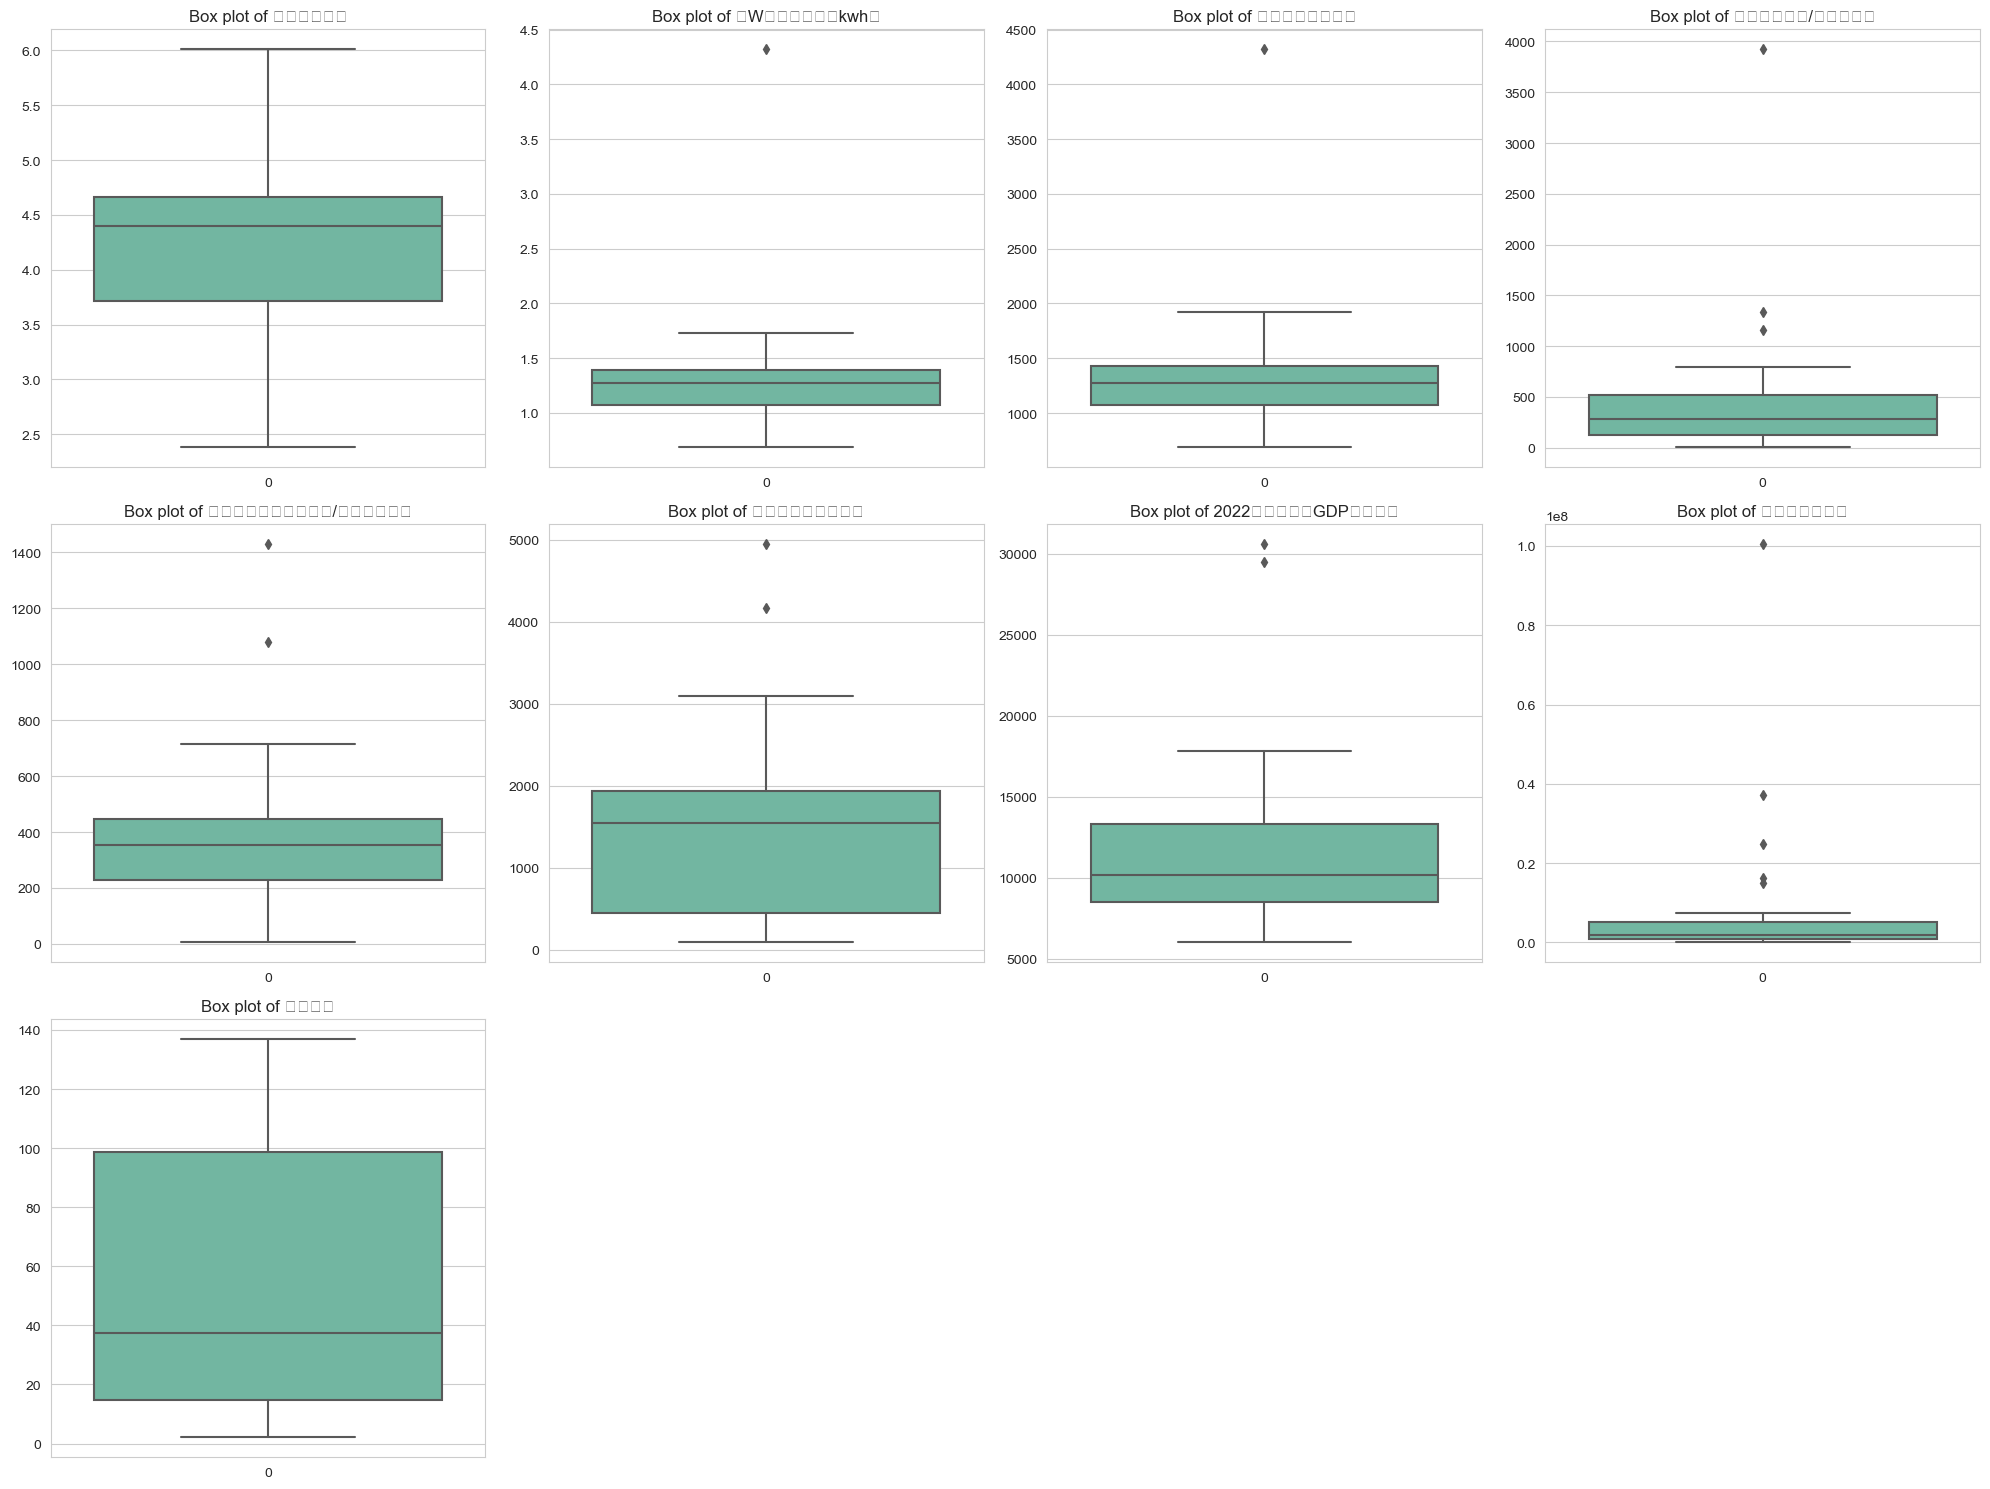

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  
# Identifying outliers using box plots for each numerical feature and the target variable
plt.figure(figsize=(20, 15))


# 设置样式
sns.set_style("whitegrid")
# 设置颜色
sns.set_palette("Set2")
for i, col in enumerate(data.columns[1:]):  # Excluding the '省份' column
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()



In [4]:
data_new = data.copy()
# Removing outliers using IQR method
Q1_new = data_new.quantile(0.25)
Q3_new = data_new.quantile(0.75)
IQR_new = Q3_new - Q1_new

# Filtering out the outliers by keeping only valid values
data_no_outliers_new = data_new[~((data_new < (Q1_new - 1.5 * IQR_new)) | (data_new > (Q3_new + 1.5 * IQR_new))).any(axis=1)]

# Displaying the shape of the data before and after outlier removal
data_new.shape, data_no_outliers_new.shape

((31, 10), (20, 10))

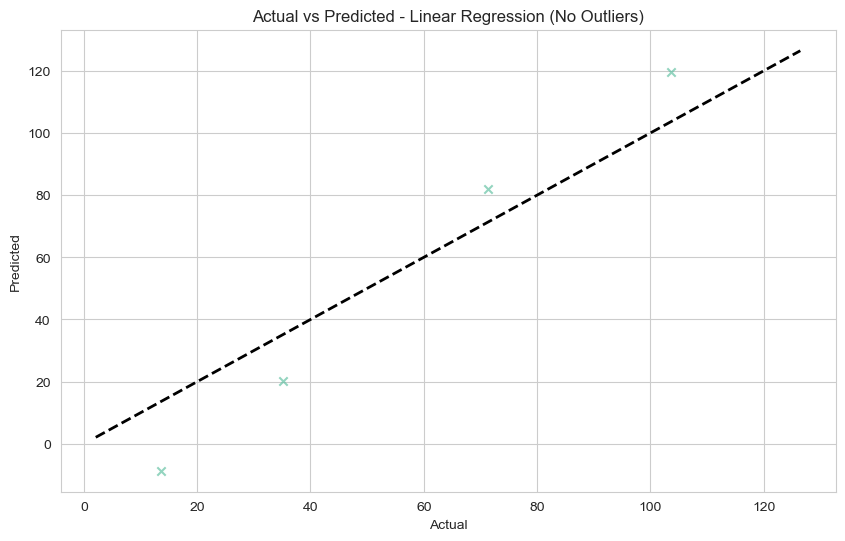

Mean Squared Error (MSE): 270.8785194194214
Coefficient of Determination (R^2): 0.7712879576800439


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Separating features and target variable after removing outliers
X_no_outliers_new = data_no_outliers_new.drop('电力产量', axis=1)
y_no_outliers_new = data_no_outliers_new['电力产量']

# Splitting the cleaned data into training and testing sets again
X_train_no_new, X_test_no_new, y_train_no_new, y_test_no_new = train_test_split(X_no_outliers_new, y_no_outliers_new, test_size=0.2, random_state=42)

# Creating a new Linear Regression model
linear_model_no_outliers_new = LinearRegression()

# Fitting the model
linear_model_no_outliers_new.fit(X_train_no_new, y_train_no_new)

# Predicting the test set results
y_pred_no_new = linear_model_no_outliers_new.predict(X_test_no_new)


# Evaluating the model
mse_no_new = mean_squared_error(y_test_no_new, y_pred_no_new)
r2_no_new = r2_score(y_test_no_new, y_pred_no_new)

# Visualization of Actual vs Predicted values after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(y_test_no_new, y_pred_no_new, alpha=0.7,marker='x' )
plt.plot([y_no_outliers_new.min(), y_no_outliers_new.max()], [y_no_outliers_new.min(), y_no_outliers_new.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression (No Outliers)')
plt.show()

MSE = mse_no_new
R2 = r2_no_new

print(f'Mean Squared Error (MSE): {MSE}')
print(f'Coefficient of Determination (R^2): {R2}')


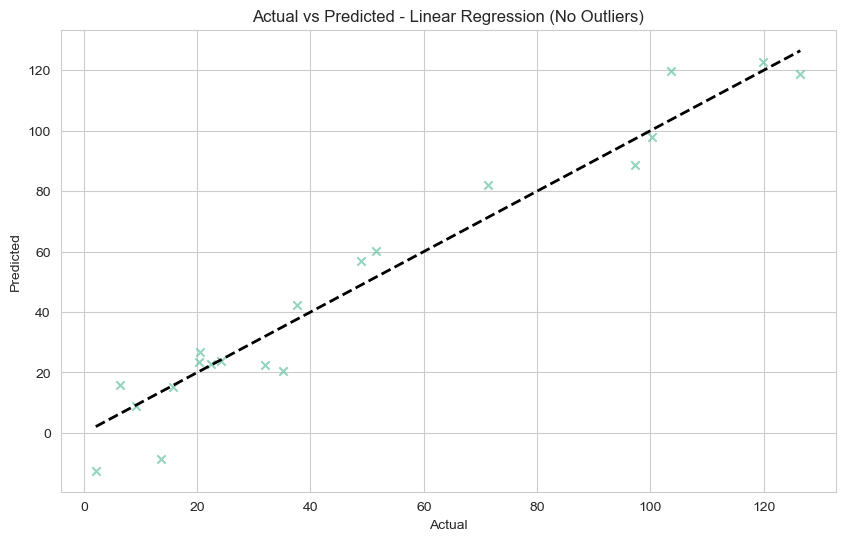

In [6]:
z_test =pd.concat([X_train_no_new, X_test_no_new])
z_actual =pd.concat([y_train_no_new, y_test_no_new])
z_pred = linear_model_no_outliers_new.predict(z_test)
# Visualization of Actual vs Predicted values after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(z_actual, z_pred, alpha=0.7,marker='x' )
plt.plot([y_no_outliers_new.min(), y_no_outliers_new.max()], [y_no_outliers_new.min(), y_no_outliers_new.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression (No Outliers)')
plt.show()

In [7]:
# Extracting the coefficients and the intercept from the model
coefficients = linear_model_no_outliers_new.coef_
intercept = linear_model_no_outliers_new.intercept_

# Constructing the regression equation
equation_terms = [f"{coef:.8f} * {col}" for coef, col in zip(coefficients, X_no_outliers_new.columns)]
equation = " + ".join(equation_terms)
regression_equation = f"Y = {intercept:.8f} + {equation}"

regression_equation

'Y = 45.86778826 + 0.07627962 * 水平面总辐照量(kWh/m2) + 207.26967580 * 峰值日照时数 + -792.45216084 * 每W首年发电量（kwh） + 0.01380107 * 年有效利用小时数 + 0.04115856 * 人口密度（人/平方公里） + -0.20836964 * 高速公路网密度（公里/万平方千米） + 0.04669411 * 装机容量（千千瓦） + -0.00193442 * 2022年人均实际GDP（亿元） + -0.00000573 * 未利用土地面积'